# Notebook de visualisation des données de positions des frappes

In [54]:
import os
import csv
import pandas as pd
import numpy as np

from config import chemin_pipeline, chemin_tt_espace, USER_PREFERENCE

In [55]:
compet='2024_WttSmash_Singapour'
match='ALEXIS-LEBRUN_vs_MA-LONG'
set=2
point=31


In [56]:
liste_clips = os.listdir(os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,"clips"))
liste_clips.sort()
liste_clips.sort(key=len)

csv_annotation_qualite = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,match+"_annotation_qualite.csv")
csv_annotation_enrichi = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,match+"_annotation_enrichi.csv")

df_qualite = pd.read_csv(csv_annotation_qualite)
df_enrichi = pd.read_csv(csv_annotation_enrichi)
liste_coup = []
liste_zone_modele = []
liste_zone_modele_cd = []
liste_zone_modele_r = []
liste_qualite = df_qualite["qualite_coup"].tolist()
for clip in liste_clips:
    chemin_csv_modele = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,"clips",clip,clip+"_annotation_zone_modele2.csv")
    chemin_csv_modele = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,"clips",clip,clip+"_annotation_zone_frappe_prece_modele_2.csv")
    #chemin_csv_modele = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,"clips",clip,clip+"_annotation_zone_frappe_orientation_1.csv")
    #chemin_csv_modele = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,"clips",clip,clip+"_annotation_zone_frappe_modele_frappe_1.csv")
    if os.path.isfile(chemin_csv_modele):
        #print(os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,"clips",clip))
        df = pd.read_csv(chemin_csv_modele)
        #print(df['zone_modele'].tolist())
        for c in df['zone_modele'].tolist():
            liste_coup.append((int(c.split(',')[0].replace(')','').replace('\'','').replace('(',''))
                               +int(c.split(',')[1].replace(')','').replace('\'','').replace('(',''))
                               +int(c.split(',')[2].replace(')','').replace('\'','').replace('(','')))/3)
            liste_zone_modele_r.append(int(c.split(',')[1].replace(')','').replace('\'','').replace('(','')))
            liste_zone_modele_cd.append(int(c.split(',')[2].replace(')','').replace('\'','').replace('(','')))
            liste_zone_modele.append(c)
    else:
        print(clip)
#for i in range(len(liste_coup)):
#    liste_coup[i].append(liste_qualite[i])
#print(liste_coup)
df_annotation_enrichi_qualite = df_enrichi.head(len(liste_coup))
#print(len(df_annotation_enrichi_qualite))
df_annotation_enrichi_qualite["zone"] = liste_coup
df_annotation_enrichi_qualite["zone_modele"] = liste_zone_modele
df_annotation_enrichi_qualite["zone_modele_r"] = liste_zone_modele_r
df_annotation_enrichi_qualite["zone_modele_cd"] = liste_zone_modele_cd
df_annotation_enrichi_qualite["qualite"] = liste_qualite[0:len(liste_coup)]

#print(df_annotation_enrichi_qualite)


set_1_point_4
set_2_point_20
set_3_point_54
set_3_point_55


c:\Python37\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Python37\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Python37\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [57]:
len(df_enrichi[(df_enrichi["faute"] == "pt_gagne") & (df_enrichi["nom"] == "MA-LONG")])

2

In [58]:
df_enrichi[(df_enrichi["faute"] == "pt_gagne") & (df_enrichi["nom"] == "MA-LONG")]["num_point"]

3       0
259    54
Name: num_point, dtype: int64

## Visualisation

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
def assign_colors(actions):
    """
    Associe une couleur à chaque type d'action dans la liste.
    
    Args:
        actions (list): Liste des actions à colorer (strings).
        
    Returns:
        list: Liste des couleurs associées.
    """
    # Définir le mapping entre les actions et les couleurs
    action_to_color = {
        "poussette": "blue",
        "topspin": "red",
        "flip": "green",
        "bloc": "orange",
        "coupe": "purple"
    }
    
    # Assigner les couleurs en fonction des actions
    colors = [action_to_color.get(action, "gray") for action in actions]  # Default to "gray" for unknown actions
    
    return colors

In [80]:
#Filtrer le csv
df_filtre = df_annotation_enrichi_qualite[(df_annotation_enrichi_qualite["num_coup"] != 1)]# & (~df_annotation_enrichi_qualite["faute"].isin(["out","filet"]))]# & (df_annotation_enrichi_qualite["effet_coup"] == "topspin")] #& (df_annotation_enrichi_qualite["set"].isin([2,4]))]
x = df_filtre["qualite"].tolist()
y = df_filtre["zone"].tolist()

,nom,debut,fin,genre,lateralite,set,systeme,coup,type_service,type_coup,...,pos_joueur_1_fin_y,pos_joueur_1_fin_z,cote_jA,cote_jB,derniere_zone,zone,zone_modele,zone_modele_r,zone_modele_cd,qualite


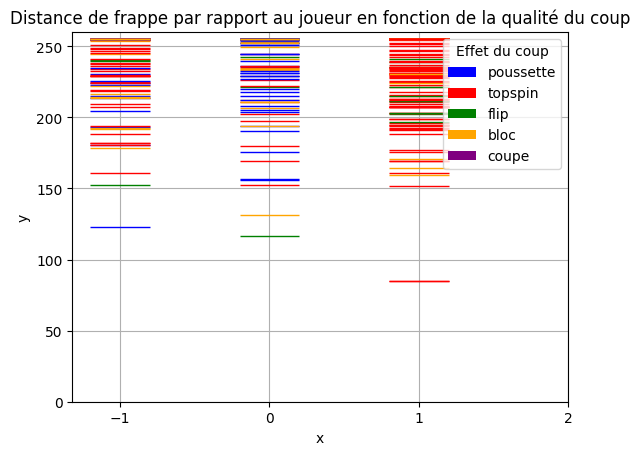

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Convertir x et y en tableaux NumPy
x1 = np.array(x)
y1 = np.array(y)

# Création des traits au lieu de points
colors = assign_colors(df_filtre["effet_coup"].tolist())  # Couleurs associées
plt.hlines(y1, xmin=x1-0.2, xmax=x1+0.2, colors=colors, linewidth=1)  # Traits horizontaux

# Ajout manuel de la légende
action_to_color = {
    "poussette": "blue",
    "topspin": "red",
    "flip": "green",
    "bloc": "orange",
    "coupe": "purple"
}
legend_elements = [Patch(facecolor=color, label=action) for action, color in action_to_color.items()]
plt.legend(handles=legend_elements, title="Effet du coup")

plt.title("Distance de frappe par rapport au joueur en fonction de la qualité du coup")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks([-1, 0, 1, 2])
plt.ylim(0, 260)
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Distance de frappe par rapport au joueur en fonction de')

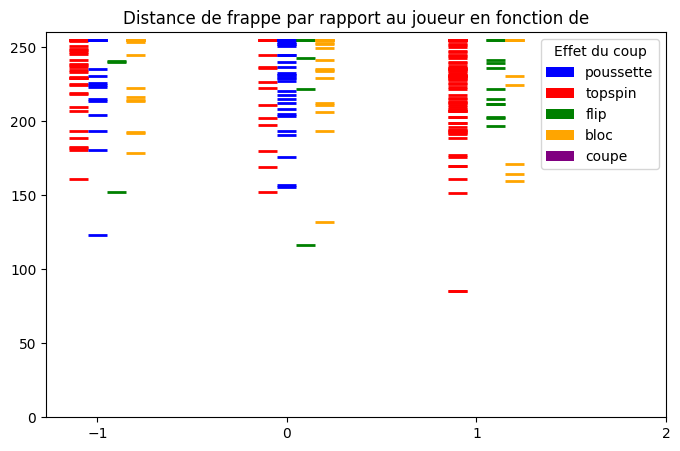

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Extraire les catégories de qualité uniques dans l'ordre
categories = df_filtre["qualite"].unique()
categories = sorted(categories)  # Trier les catégories pour cohérence

# Convertir x, y et qualité en tableaux NumPy
x = np.array(df_filtre["qualite"])  # Qualité en valeurs numériques ou textuelles
y = np.array(df_filtre["zone"])  # Valeurs en ordonnée
effet_coup = df_filtre["effet_coup"].astype(str).to_numpy()  # Convertir en string

# Définition des couleurs
action_to_color = {
    "poussette": "blue",
    "topspin": "red",
    "flip": "green",
    "bloc": "orange",
    "coupe": "purple"
}

# Positionner les barres pour éviter la superposition
x_offsets = np.linspace(-0.25, 0.25, len(categories))  # Décalages pour séparer les groupes
effet_coup_unique = ["topspin","poussette","flip","bloc"]

# Créer la figure
plt.figure(figsize=(8, 5))

taille = 0.05
# Dessiner les traits pour chaque catégorie de qualité
for i, cat in enumerate(categories):
    deplacement = 0
    for e in effet_coup_unique:
        x = np.array(df_filtre[df_filtre["effet_coup"] == e]["qualite"])  # Qualité en valeurs numériques ou textuelles
        y = np.array(df_filtre[df_filtre["effet_coup"] == e]["zone"])
        mask = (x == cat)  # Sélectionner les données correspondant à cette qualité
        x_shifted = np.full(np.sum(mask), i) + x_offsets[i] + deplacement  # Décalage des barres
        x_shifted = cat - 2*taille  + deplacement  # Décalage des barres
        y_values = y[mask]
        #colors = [action_to_color[effet] for effet in effet_coup[mask]]  # Couleurs associées
        plt.hlines(y_values, xmin=x_shifted-taille, xmax=x_shifted+taille, colors=action_to_color[e], linewidth=2, label=f"Qualité {cat}")
        deplacement += taille*2

# Ajout manuel de la légende pour les couleurs des coups
legend_elements = [Patch(facecolor=color, label=action) for action, color in action_to_color.items()]
plt.legend(handles=legend_elements, title="Effet du coup")
plt.xticks([-1, 0, 1, 2])

plt.ylim(0, 260)

# Personnalisation du graphique
plt.title("Distance de frappe par rapport au joueur en fonction de")


Text(0.5, 1.0, 'Relation entre la position de frappe et la zone')

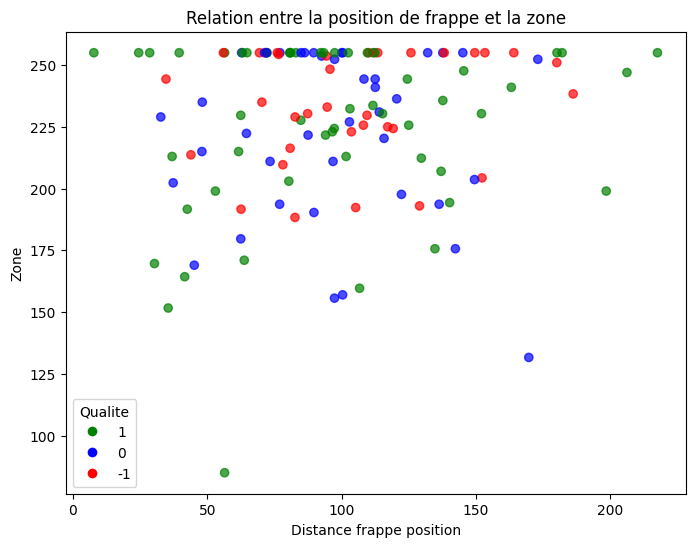

In [64]:
df_filtre_joueur = df_filtre[df_filtre["nom"] != "ALEXIS-LEBRUN"]

dist_joueur_0 = np.sqrt((df_filtre_joueur["coor_frappe_x"] - df_filtre_joueur["pos_joueur_0_x"])**2 + 
                         (df_filtre_joueur["coor_frappe_y"] - df_filtre_joueur["pos_joueur_0_y"])**2)

dist_joueur_1 = np.sqrt((df_filtre_joueur["coor_frappe_x"] - df_filtre_joueur["pos_joueur_1_x"])**2 + 
                         (df_filtre_joueur["coor_frappe_y"] - df_filtre_joueur["pos_joueur_1_y"])**2)

# Prendre la distance minimale entre les deux joueurs pour chaque frappe
x_values = np.minimum(dist_joueur_0, dist_joueur_1)
#x_values = (df_filtre_joueur["coor_frappe_x"].iloc[i] - df_filtre_joueur["pos_joueur_0_x"].iloc[i])**2 + (df_filtre_joueur["coor_frappe_y"].iloc[i] - df_filtre_joueur["pos_joueur_0_y"].iloc[i])**2
y_values = df_filtre_joueur["zone"]  # Colonne "zone" en y

# Création du graphique
couleurs = assign_colors(df_filtre_joueur["effet_coup"].tolist())  # Couleurs associées

# Ajout manuel de la légende
action_to_color = {
    "poussette": "blue",
    "topspin": "red",
    "flip": "green",
    "bloc": "orange",
    "coupe": "purple"
}
#df_filtre["qualite"].tolist()

#couleur qualité
couleurs_map = {1: "green", 0: "blue", -1: "red"}
couleurs = df_filtre_joueur["qualite"].map(couleurs_map) 

legend_elements = [Patch(facecolor=color, label=action) for action, color in action_to_color.items()]

from matplotlib.lines import Line2D 
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor="green", markersize=8, label="1"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor="blue", markersize=8, label="0"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor="red", markersize=8, label="-1")
]

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c=couleurs, alpha=0.7)  # Nuage de points

plt.legend(handles=legend_elements, title="Qualite")

# Ajout des labels et titre
plt.xlabel("Distance frappe position")
plt.ylabel("Zone")
plt.title("Relation entre la position de frappe et la zone")

Text(0.5, 1.0, 'Relation entre la position de frappe et la zone')

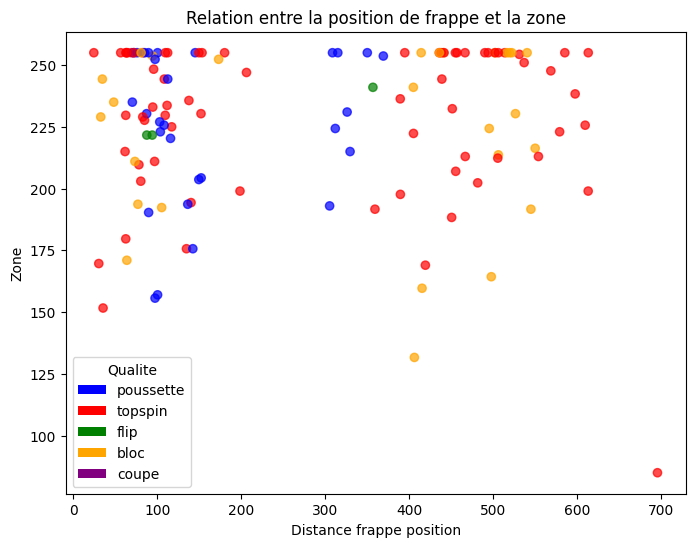

In [65]:
df_filtre_joueur = df_filtre[df_filtre["nom"] != "ALEXIS-LEBRUN"]

dist_joueur_0 = np.sqrt((df_filtre_joueur["coor_frappe_x"] - df_filtre_joueur["pos_joueur_0_x"])**2 + 
                         (df_filtre_joueur["coor_frappe_y"] - df_filtre_joueur["pos_joueur_0_y"])**2)

dist_joueur_1 = np.sqrt((df_filtre_joueur["coor_frappe_x"] - df_filtre_joueur["pos_joueur_0_x"])**2 + 
                         (df_filtre_joueur["coor_frappe_y"] - df_filtre_joueur["pos_joueur_0_y"])**2)

# Prendre la distance minimale entre les deux joueurs pour chaque frappe
x_values = np.minimum(dist_joueur_0, dist_joueur_1)
#x_values = (df_filtre_joueur["coor_frappe_x"].iloc[i] - df_filtre_joueur["pos_joueur_0_x"].iloc[i])**2 + (df_filtre_joueur["coor_frappe_y"].iloc[i] - df_filtre_joueur["pos_joueur_0_y"].iloc[i])**2
y_values = df_filtre_joueur["zone"]  # Colonne "zone" en y

# Création du graphique
couleurs = assign_colors(df_filtre_joueur["effet_coup"].tolist())  # Couleurs associées

# Ajout manuel de la légende
action_to_color = {
    "poussette": "blue",
    "topspin": "red",
    "flip": "green",
    "bloc": "orange",
    "coupe": "purple"
}

legend_elements = [Patch(facecolor=color, label=action) for action, color in action_to_color.items()]
#df_filtre["qualite"].tolist()

#couleur qualité
"""couleurs_map = {1: "green", 0: "blue", -1: "red"}
couleurs = df_filtre_joueur["qualite"].map(couleurs_map) 


from matplotlib.lines import Line2D 
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor="green", markersize=8, label="1"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor="blue", markersize=8, label="0"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor="red", markersize=8, label="-1")
]"""

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c=couleurs, alpha=0.7)  # Nuage de points

plt.legend(handles=legend_elements, title="Qualite")

# Ajout des labels et titre
plt.xlabel("Distance frappe position")
plt.ylabel("Zone")
plt.title("Relation entre la position de frappe et la zone")

### Calcul de la precision du modèle
Attention le choix du modèle est fait au début avec les csv que l'on décide d'utiliser

In [66]:
print("Nombre de coups:",len(np.array(df_filtre["zone"])))
zone = np.array(df_filtre["zone"])
nb255 = np.count_nonzero(zone == 255)
nbautre = np.count_nonzero(zone != 255)
print("Nombre de coup n'appartenant pas au modèle:",nb255)
print("Nombre de coup appartenant au modèle:",nbautre)
#print("Precision:",nb255/nbautre*100,"%")
print("Precision:",nbautre/(nb255+nbautre)*100,"%")

Nombre de coups: 266
Nombre de coup n'appartenant pas au modèle: 79
Nombre de coup appartenant au modèle: 187
Precision: 70.30075187969925 %


Text(0.5, 1.0, 'Distance de frappe par rapport au joueur en fonction de la qualité')

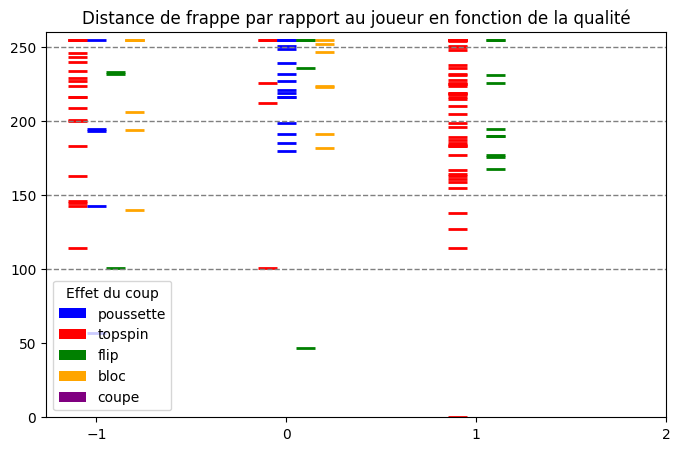

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

df_filtre_joueur = df_filtre[df_filtre["nom"] == "ALEXIS-LEBRUN"]
# Extraire les catégories de qualité uniques dans l'ordre
categories = df_filtre_joueur["qualite"].unique()
categories = sorted(categories)  # Trier les catégories pour cohérence

# Définition des couleurs
action_to_color = {
    "poussette": "blue",
    "topspin": "red",
    "flip": "green",
    "bloc": "orange",
    "coupe": "purple"
}

# Positionner les barres pour éviter la superposition
x_offsets = np.linspace(-0.25, 0.25, len(categories))  # Décalages pour séparer les groupes
effet_coup_unique = ["topspin","poussette","flip","bloc"]

# Créer la figure
plt.figure(figsize=(8, 5))

taille = 0.05
# Dessiner les traits pour chaque catégorie de qualité
for i, cat in enumerate(categories):
    deplacement = 0
    for e in effet_coup_unique:
        x = np.array(df_filtre_joueur[df_filtre_joueur["effet_coup"] == e]["qualite"])  # Qualité en valeurs numériques ou textuelles
        y = np.array(df_filtre_joueur[df_filtre_joueur["effet_coup"] == e]["zone_modele_cd"])
        mask = (x == cat)  # Sélectionner les données correspondant à cette qualité
        x_shifted = np.full(np.sum(mask), i) + x_offsets[i] + deplacement  # Décalage des barres
        x_shifted = cat - 2*taille  + deplacement  # Décalage des barres
        y_values = y[mask]
        #colors = [action_to_color[effet] for effet in effet_coup[mask]]  # Couleurs associées
        plt.hlines(y_values, xmin=x_shifted-taille, xmax=x_shifted+taille, colors=action_to_color[e], linewidth=2, label=f"Qualité {cat}")
        deplacement += taille*2


seuils = [100, 150, 200, 250]
for seuil in seuils:
    plt.axhline(y=seuil, color='gray', linestyle='--', linewidth=1)


# Ajout manuel de la légende pour les couleurs des coups
legend_elements = [Patch(facecolor=color, label=action) for action, color in action_to_color.items()]
plt.legend(handles=legend_elements, title="Effet du coup")
plt.xticks([-1, 0, 1, 2])

plt.ylim(0, 260)

# Personnalisation du graphique
plt.title("Distance de frappe par rapport au joueur en fonction de la qualité")


In [68]:
len(df_filtre_joueur[(df_filtre_joueur["lateralite"] == "revers") & (df_filtre_joueur["effet_coup"] == "topspin")])

64

In [69]:
len(df_filtre_joueur[df_filtre_joueur["effet_coup"] == e])

16

In [70]:
seuils = [100, 150, 200, 250]
df_filtre_joueur_coup_droit = df_filtre_joueur[df_filtre_joueur["lateralite"] == "coup_droit"]
df_filtre_joueur_coup_droit.reset_index(drop=True, inplace=True)
df_filtre_joueur_revers = df_filtre_joueur[df_filtre_joueur["lateralite"] == "revers"]
df_filtre_joueur_revers.reset_index(drop=True, inplace=True)

bins = [0, 1, 100, 150, 200, 250, 256]  # Ajouter 0 et inf pour couvrir toutes les valeurs
labels = ["0", "1", "2", "3", "4", "5"]

# Création de la colonne 'zone'
df_filtre_joueur_coup_droit["valeur_zone"] = pd.cut(df_filtre_joueur_coup_droit["zone_modele_cd"], bins=bins, labels=labels, right=False)
df_filtre_joueur_revers["valeur_zone"] = pd.cut(df_filtre_joueur_revers["zone_modele_r"], bins=bins, labels=labels, right=False)


print('#######')
print('Coup droit:')
print("Nombre de coups:",len(np.array(df_filtre_joueur_coup_droit["zone_modele_cd"])))
zone = np.array(df_filtre_joueur_coup_droit["zone_modele_cd"])
nb255 = np.count_nonzero(zone == 0)
nbautre = np.count_nonzero(zone != 0)
print("Nombre de coup n'appartenant pas au modèle:",nb255)
print("Nombre de coup appartenant au modèle:",nbautre)
#print("Precision:",nb255/nbautre*100,"%")
print("Precision:",nbautre/(nb255+nbautre)*100,"%")
print('#######')
print('Revers:')
print("Nombre de coups:",len(np.array(df_filtre_joueur_revers["zone_modele_r"])))
zone = np.array(df_filtre_joueur_revers["zone_modele_r"])
nb255 = np.count_nonzero(zone == 0)
nbautre = np.count_nonzero(zone != 0)
print("Nombre de coup n'appartenant pas au modèle:",nb255)
print("Nombre de coup appartenant au modèle:",nbautre)
#print("Precision:",nb255/nbautre*100,"%")
print("Precision:",nbautre/(nb255+nbautre)*100,"%")

#######
Coup droit:
Nombre de coups: 44
Nombre de coup n'appartenant pas au modèle: 1
Nombre de coup appartenant au modèle: 43
Precision: 97.72727272727273 %
#######
Revers:
Nombre de coups: 93
Nombre de coup n'appartenant pas au modèle: 0
Nombre de coup appartenant au modèle: 93
Precision: 100.0 %


c:\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\Python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


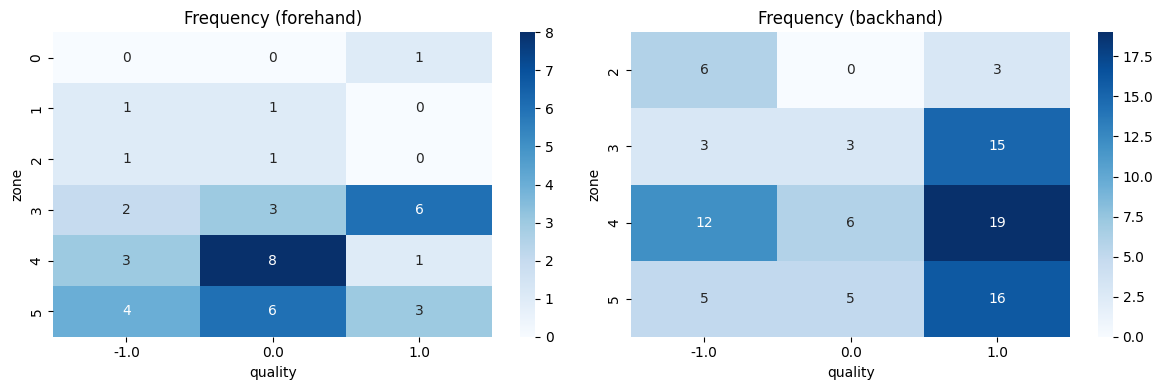

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Création des tables de contingence
contingency_table1 = pd.crosstab(df_filtre_joueur_coup_droit["valeur_zone"], df_filtre_joueur_coup_droit["qualite"])
contingency_table2 = pd.crosstab(df_filtre_joueur_revers["valeur_zone"], df_filtre_joueur_revers["qualite"])

# Création des sous-graphes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Tracé de la première heatmap
sns.heatmap(contingency_table1, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Frequency (forehand)")
axes[0].set_xlabel("quality")
axes[0].set_ylabel("zone")

# Tracé de la deuxième heatmap
sns.heatmap(contingency_table2, annot=True, cmap="Blues", fmt="d", ax=axes[1])
axes[1].set_title("Frequency (backhand)")
axes[1].set_xlabel("quality")
axes[1].set_ylabel("zone")

# Affichage des graphiques
plt.tight_layout()
plt.show()



In [72]:
df_filtre_joueur_coup_droit[df_filtre_joueur_coup_droit["num_point"] == 20]["valeur_zone"]

17    3
18    4
Name: valeur_zone, dtype: category
Categories (6, object): ['0' < '1' < '2' < '3' < '4' < '5']

In [73]:
df_filtre_joueur_revers[df_filtre_joueur_revers["zone_modele_r"] == 0]["num_point"]

Series([], Name: num_point, dtype: int64)

In [81]:
df_filtre_joueur_coup_droit[df_filtre_joueur_coup_droit["num_point"] == 20]

,nom,debut,fin,genre,lateralite,set,systeme,coup,type_service,type_coup,...,pos_joueur_1_fin_z,cote_jA,cote_jB,derniere_zone,zone,zone_modele,zone_modele_r,zone_modele_cd,qualite,valeur_zone
17,ALEXIS-LEBRUN,9281,9292,garcon,coup_droit,2,att/att,ALEXIS-LEBRUN,NaN,offensif,...,g6,bas,haut,0,211.000000,"(255, 189, 189)",189,189,1.0,3
18,ALEXIS-LEBRUN,9305,9322,garcon,coup_droit,2,att/att,serveur_point_pour,NaN,intermediaire,...,e8,bas,haut,0,239.666667,"(255, 232, 232)",232,232,NaN,4


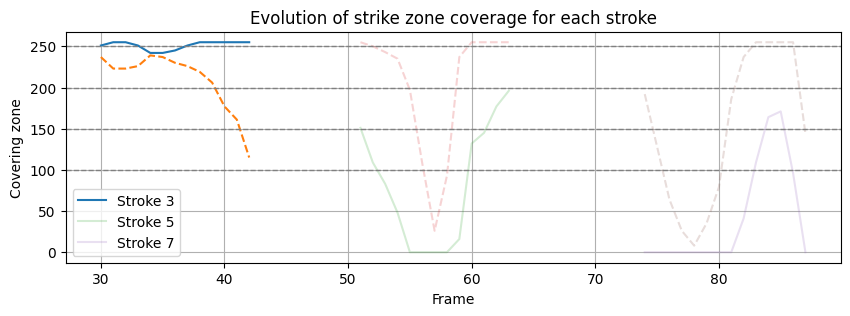

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Charger les données
df_filtered = df_filtre[df_filtre["num_point"] == 55]
df_continu_zones = pd.read_csv(os.path.join("C:/Users/ReViVD/Desktop/dataroom/pipeline-tt/2024_WttSmash_Singapour/ALEXIS-LEBRUN_vs_MA-LONG/clips/set_3_point_55/set_3_point_55_zone_continue_ALEXIS-LEBRUN.csv"))

df_continu_zones_filtre = df_continu_zones[df_continu_zones["lateralite"] == "revers"]

# Création du graphique
fig, ax = plt.subplots(figsize=(10, len(df_filtered) * 0.5))  # Ajuster la hauteur du graphe

# Boucle pour tracer les courbes en utilisant 'frame' comme X et 'zone_modele' comme Y
for i, (index, row) in enumerate(df_filtered.iterrows()):
    df_courbe = df_continu_zones[df_continu_zones["num_coup"] == row["num_coup"]]  # Sélectionner les valeurs pour ce coup
    
    if not df_courbe.empty:
        alpha = 0.2 if row["lateralite"] == "coup_droit" else 1.0
        ax.plot(df_courbe["frame"], df_courbe["zone_modele_r"], label=f"Stroke {row['num_coup']}", alpha=alpha)
        
        ax.plot(df_courbe["frame"], df_courbe["zone_modele_cd"], linestyle="dashed", alpha=alpha)


seuils = [100, 150, 200, 250]
for seuil in seuils:
    plt.axhline(y=seuil, color='gray', linestyle='--', linewidth=1)

# Personnalisation du graphique
ax.set_xlabel("Frame")
ax.set_ylabel("Covering zone")
ax.set_title("Evolution of strike zone coverage for each stroke")

plt.legend()
plt.grid(True)
plt.show()


In [90]:
df_filtre[df_filtre["num_point"] == 67]

,nom,debut,fin,genre,lateralite,set,systeme,coup,type_service,type_coup,...,pos_joueur_1_fin_y,pos_joueur_1_fin_z,cote_jA,cote_jB,derniere_zone,zone,zone_modele,zone_modele_r,zone_modele_cd,qualite
323,MA-LONG,32306,32318,garcon,revers,4,att/att,MA-LONG,NaN,defensif,...,222.946838,g5,bas,haut,0,227.000000,"(255, 213, 213)",213,213,0.0
324,ALEXIS-LEBRUN,32319,32339,garcon,coup_droit,4,att/att,ALEXIS-LEBRUN,NaN,defensif,...,256.475525,m6,bas,haut,0,232.333333,"(255, 221, 221)",221,221,0.0
325,MA-LONG,32340,32355,garcon,coup_droit,4,att/att,MA-LONG,NaN,defensif,...,256.393127,d6,bas,haut,0,193.666667,"(255, 163, 163)",163,163,0.0
326,ALEXIS-LEBRUN,32356,32366,garcon,revers,4,att/att,ALEXIS-LEBRUN,NaN,intermediaire,...,258.752197,m6,bas,haut,0,235.666667,"(255, 226, 226)",226,226,1.0
327,MA-LONG,32367,32381,garcon,coup_droit,4,att/att,MA-LONG,NaN,intermediaire,...,285.211731,m7,bas,haut,0,252.333333,"(255, 251, 251)",251,251,0.0
328,ALEXIS-LEBRUN,32382,32388,garcon,revers,4,att/att,ALEXIS-LEBRUN,NaN,offensif,...,282.550842,m7,bas,haut,0,254.333333,"(255, 254, 254)",254,254,1.0
329,MA-LONG,32389,32397,garcon,revers,4,att/att,MA-LONG,NaN,intermediaire,...,248.118958,g6,bas,haut,0,255.000000,"(255, 255, 255)",255,255,1.0
330,ALEXIS-LEBRUN,32398,32407,garcon,coup_droit,4,att/att,ALEXIS-LEBRUN,NaN,offensif,...,248.834473,g6,bas,haut,0,207.000000,"(255, 183, 183)",183,183,1.0
331,MA-LONG,32408,32418,garcon,revers,4,att/att,MA-LONG,NaN,intermediaire,...,261.539734,g6,bas,haut,0,193.666667,"(255, 163, 163)",163,163,0.0
332,ALEXIS-LEBRUN,32419,32425,garcon,revers,4,att/att,ALEXIS-LEBRUN,NaN,offensif,...,266.191528,h6,bas,haut,0,242.333333,"(255, 236, 236)",236,236,1.0


In [79]:
liste_clips = os.listdir(os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,"clips"))
liste_clips.sort()
liste_clips.sort(key=len)

csv_annotation_qualite = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,match+"_annotation_qualite.csv")
csv_annotation_enrichi = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,match+"_annotation_enrichi.csv")

df_qualite = pd.read_csv(csv_annotation_qualite)
df_enrichi = pd.read_csv(csv_annotation_enrichi)

liste_qualite = df_qualite["qualite_coup"].tolist()


df_annotation_enrichi_qualite["qualite"] = liste_qualite#[0:len(liste_coup)]


liste_qualite_continue = []
df_list = []
for clip in liste_clips:
    chemin_csv_continu = os.path.join(USER_PREFERENCE["pipeline"]["LOCAL-PIPELINE-TT"],compet,match,"clips",clip,clip+"_zone_continue_ALEXIS-LEBRUN.csv")
    df_continue = pd.read_csv(chemin_csv_continu)
    liste_qualite_continue = []
    liste_winner = []
    for index, row in df_continue.iterrows():
        liste_winner.append(str(df_annotation_enrichi_qualite[(df_annotation_enrichi_qualite["num_point"] == row["num_point"]) & (df_annotation_enrichi_qualite["num_coup"] == row["num_coup"])]["winner"].iloc[0]))
        if row["num_coup"] != 0:
            liste_qualite_continue.append(int(df_annotation_enrichi_qualite[(df_annotation_enrichi_qualite["num_point"] == row["num_point"]) & (df_annotation_enrichi_qualite["num_coup"] == row["num_coup"])]["qualite"]))
        else:
            liste_qualite_continue.append(0)
    df_continue["qualite"] = liste_qualite_continue
    df_continue["winner"] = liste_winner
    #print(df_continue[df_continue["qualite"] == 1])

    df_list.append(df_continue)

df_final = pd.concat(df_list, ignore_index=True)


In [80]:
df_final["winner"]

0       MA-LONG
1       MA-LONG
2       MA-LONG
3       MA-LONG
4       MA-LONG
         ...   
2037    MA-LONG
2038    MA-LONG
2039    MA-LONG
2040    MA-LONG
2041    MA-LONG
Name: winner, Length: 2042, dtype: object

In [23]:
df_annotation_enrichi_qualite[(df_annotation_enrichi_qualite["num_point"] == 2) & (df_annotation_enrichi_qualite["num_coup"] == 2)]

,nom,debut,fin,genre,lateralite,set,systeme,coup,type_service,type_coup,...,pos_joueur_1_fin_y,pos_joueur_1_fin_z,cote_jA,cote_jB,derniere_zone,zone,zone_modele,zone_modele_r,zone_modele_cd,qualite
9,ALEXIS-LEBRUN,784,795,garcon,coup_droit,1,att/att,ALEXIS-LEBRUN,NaN,intermediaire,...,185.863037,g5,haut,bas,0,168.333333,"(0,255,250)",255,250,0


In [52]:
df_annotation_enrichi_qualite[(df_annotation_enrichi_qualite["num_point"] == 62)]

,nom,debut,fin,genre,lateralite,set,systeme,coup,type_service,type_coup,...,pos_joueur_1_fin_y,pos_joueur_1_fin_z,cote_jA,cote_jB,derniere_zone,zone,zone_modele,zone_modele_r,zone_modele_cd,qualite
284,ALEXIS-LEBRUN,29812,29823,garcon,coup_droit,4,att/att,ALEXIS-LEBRUN,lat_gauche,NaN,...,-159.989227,g4,bas,haut,0,201.000000,"(255, 174, 174)",174,174,0.0
285,MA-LONG,29824,29835,garcon,coup_droit,4,att/att,MA-LONG,NaN,intermediaire,...,-175.238434,m4,bas,haut,0,156.333333,"(255, 107, 107)",107,107,1.0
286,ALEXIS-LEBRUN,29836,29844,garcon,revers,4,att/att,ALEXIS-LEBRUN,NaN,intermediaire,...,-219.418060,g5,bas,haut,0,160.333333,"(255, 113, 113)",113,113,1.0
287,MA-LONG,29845,29854,garcon,revers,4,att/att,MA-LONG,NaN,intermediaire,...,-256.913788,h6,bas,haut,0,221.666667,"(255, 205, 205)",205,205,1.0
288,ALEXIS-LEBRUN,29855,29861,garcon,revers,4,att/att,ALEXIS-LEBRUN,NaN,intermediaire,...,-270.316788,h6,bas,haut,0,199.000000,"(255, 171, 171)",171,171,1.0
289,MA-LONG,29862,29871,garcon,revers,4,att/att,MA-LONG,NaN,intermediaire,...,-264.942108,h6,bas,haut,0,196.333333,"(255, 167, 167)",167,167,1.0
290,ALEXIS-LEBRUN,29872,29878,garcon,revers,4,att/att,ALEXIS-LEBRUN,NaN,offensif,...,-279.096390,h7,bas,haut,0,199.000000,"(255, 171, 171)",171,171,1.0
291,MA-LONG,29879,29889,garcon,coup_droit,4,att/att,MA-LONG,NaN,intermediaire,...,-281.501953,h7,bas,haut,0,222.333333,"(255, 206, 206)",206,206,1.0
292,ALEXIS-LEBRUN,29890,29905,garcon,coup_droit,4,att/att,ALEXIS-LEBRUN,NaN,intermediaire,...,-296.166183,h7,bas,haut,0,169.666667,"(255, 127, 127)",127,127,-1.0
293,MA-LONG,29906,29919,garcon,coup_droit,4,att/att,MA-LONG,NaN,offensif,...,-226.167007,i5,bas,haut,1,205.666667,"(255, 181, 181)",181,181,1.0


c:\Python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


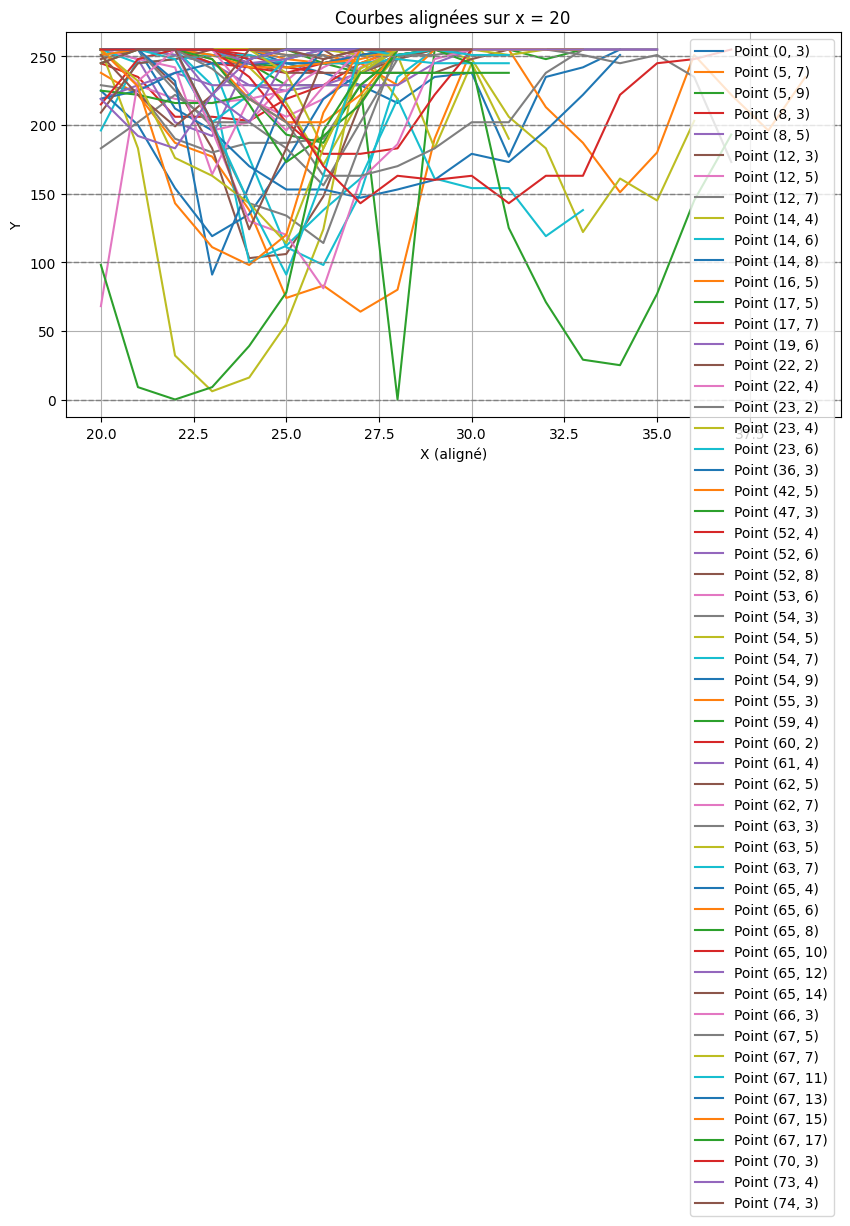

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Exemple : Chargement du DataFrame
# df = pd.read_csv("chemin_vers_ton_fichier.csv")

# Aligner les courbes sur x = 20
q=0
df_local = df_final[(df_final["lateralite"] == "revers") & 
         (df_final["effet_coup"].isin(["topspin", "bloc"])) & 
         #(df_final["qualite"] == q) & 
         (df_final["winner"] != "ALEXIS-LEBRUN") & 
         (df_final["num_point"] != 402)]



df_local["x_aligne"] = df_local["frame"] - df_local.groupby(["num_point", "num_coup"])["frame"].transform("first") + 20

# Tracer les courbes
plt.figure(figsize=(10, 5))
for num_point, data in df_local.groupby(["num_point", "num_coup"]):
    plt.plot(data["x_aligne"], data["zone_modele_r"], label=f"Point {num_point}")

# Personnalisation

seuils = [0,100, 150, 200, 250]
for seuil in seuils:
    plt.axhline(y=seuil, color='gray', linestyle='--', linewidth=1)

plt.xlabel("X (aligné)")
plt.ylabel("Y")
plt.title("Courbes alignées sur x = 20")
plt.legend()
plt.grid()
plt.show()


In [108]:
df_groupe_points_perdant = df_final[(df_final["lateralite"] == "revers") & 
         (df_final["effet_coup"].isin(["topspin", "bloc"])) & 
         #(df_final["qualite"] == q) & 
         (df_final["winner"] != "ALEXIS-LEBRUN") & 
         (df_final["num_point"] != 402)].groupby("num_point")["zone_modele_r"].min().reset_index()
df_groupe_points_gagnant = df_final[(df_final["lateralite"] == "revers") & 
         (df_final["effet_coup"].isin(["topspin", "bloc"])) & 
         #(df_final["qualite"] == q) & 
         (df_final["winner"] == "ALEXIS-LEBRUN")].groupby("num_point")["zone_modele_r"].min().reset_index()

print("Stats en groupant par gagné/perdu:")

print("Zone <= 50 perdu:",len(df_groupe_points_perdant[df_groupe_points_perdant["zone_modele_r"] <= 50]))
print("Zone <= 50 gagné:",len(df_groupe_points_gagnant[df_groupe_points_gagnant["zone_modele_r"] <= 50]))

print("Zone <= 150 perdu:",len(df_groupe_points_perdant[(df_groupe_points_perdant["zone_modele_r"] <= 150) & (df_groupe_points_perdant["zone_modele_r"] > 50)]))
print("Zone <= 150 gagné:",len(df_groupe_points_gagnant[(df_groupe_points_gagnant["zone_modele_r"] <= 150) & (df_groupe_points_gagnant["zone_modele_r"] > 50)]))

print("Zone <= 200 perdu:",len(df_groupe_points_perdant[(df_groupe_points_perdant["zone_modele_r"] <= 200) & (df_groupe_points_perdant["zone_modele_r"] > 150)]))
print("Zone <= 200 gagné:",len(df_groupe_points_gagnant[(df_groupe_points_gagnant["zone_modele_r"] <= 200) & (df_groupe_points_gagnant["zone_modele_r"] > 150)]))

print("Zone > 200 perdu:",len(df_groupe_points_perdant[(df_groupe_points_perdant["zone_modele_r"] > 200)]))
print("Zone > 200 gagné:",len(df_groupe_points_gagnant[(df_groupe_points_gagnant["zone_modele_r"] > 200)]))

print("Nb perdus:",len(df_groupe_points_perdant))
print("Nb gagnes:",len(df_groupe_points_gagnant))



Stats en groupant par gagné/perdu:
Zone <= 50 perdu: 4
Zone <= 50 gagné: 1
Zone <= 150 perdu: 8
Zone <= 150 gagné: 4
Zone <= 200 perdu: 8
Zone <= 200 gagné: 4
Zone > 200 perdu: 8
Zone > 200 gagné: 8
Nb perdus: 28
Nb gagnes: 17


In [111]:
df_groupe_qualite_moins1 = df_final[(df_final["lateralite"] == "revers") & 
         (df_final["effet_coup"].isin(["topspin", "bloc"])) & 
         (df_final["qualite"] == -1)].groupby("num_point")["zone_modele_r"].min().reset_index()
df_groupe_qualite_0 = df_final[(df_final["lateralite"] == "revers") & 
         (df_final["effet_coup"].isin(["topspin", "bloc"])) & 
         (df_final["qualite"] == 0)].groupby("num_point")["zone_modele_r"].min().reset_index()
df_groupe_qualite_1 = df_final[(df_final["lateralite"] == "revers") & 
         (df_final["effet_coup"].isin(["topspin", "bloc"])) & 
         (df_final["qualite"] == 1)].groupby("num_point")["zone_modele_r"].min().reset_index()



print("Stats en groupant par qualité")

print("Zone <= 50 qualité -1:",len(df_groupe_qualite_moins1[df_groupe_qualite_moins1["zone_modele_r"] <= 50]))
print("Zone <= 50 qualité 0:",len(df_groupe_qualite_0[df_groupe_qualite_0["zone_modele_r"] <= 50]))
print("Zone <= 50 qualité 1:",len(df_groupe_qualite_1[df_groupe_qualite_1["zone_modele_r"] <= 50]))
print("----------------")
print("Zone <= 150 qualité -1:",len(df_groupe_qualite_moins1[(df_groupe_qualite_moins1["zone_modele_r"] <= 150) & (df_groupe_qualite_moins1["zone_modele_r"] > 50)]))
print("Zone <= 150 qualité 0:",len(df_groupe_qualite_0[(df_groupe_qualite_0["zone_modele_r"] <= 150) & (df_groupe_qualite_0["zone_modele_r"] > 50)]))
print("Zone <= 150 qualité 1:",len(df_groupe_qualite_1[(df_groupe_qualite_1["zone_modele_r"] <= 150) & (df_groupe_qualite_1["zone_modele_r"] > 50)]))
print("----------------")
print("Zone <= 200 qualité -1:",len(df_groupe_qualite_moins1[(df_groupe_qualite_moins1["zone_modele_r"] <= 200) & (df_groupe_qualite_moins1["zone_modele_r"] > 150)]))
print("Zone <= 200 qualité 0:",len(df_groupe_qualite_0[(df_groupe_qualite_0["zone_modele_r"] <= 200) & (df_groupe_qualite_0["zone_modele_r"] > 150)]))
print("Zone <= 200 qualité 1:",len(df_groupe_qualite_1[(df_groupe_qualite_1["zone_modele_r"] <= 200) & (df_groupe_qualite_1["zone_modele_r"] > 150)]))
print("----------------")
print("Zone > 200 qualité -1:",len(df_groupe_qualite_moins1[(df_groupe_qualite_moins1["zone_modele_r"] > 200)]))
print("Zone > 200 qualité 0:",len(df_groupe_qualite_0[(df_groupe_qualite_0["zone_modele_r"] > 200)]))
print("Zone > 200 qualité 1:",len(df_groupe_qualite_1[(df_groupe_qualite_1["zone_modele_r"] > 200)]))
print("----------------")
print("Nb qualité -1:",len(df_groupe_points_perdant))
print("Nb qualité 0:",len(df_groupe_qualite_0))
print("Nb qualité 1:",len(df_groupe_qualite_1))



Stats en groupant par qualité
Zone <= 50 qualité -1: 3
Zone <= 50 qualité 0: 2
Zone <= 50 qualité 1: 0
----------------
Zone <= 150 qualité -1: 6
Zone <= 150 qualité 0: 1
Zone <= 150 qualité 1: 10
----------------
Zone <= 200 qualité -1: 7
Zone <= 200 qualité 0: 1
Zone <= 200 qualité 1: 8
----------------
Zone > 200 qualité -1: 7
Zone > 200 qualité 0: 5
Zone > 200 qualité 1: 12
----------------
Nb qualité -1: 28
Nb qualité 0: 9
Nb qualité 1: 30


In [117]:
df_groupe_qualite_revers

,num_point,zone_modele_r,qualite,valeur_zone
0,0,177,1.0,3
1,2,245,1.0,4
2,5,0,-1.0,0
3,6,229,1.0,4
4,7,206,0.0,4
5,8,203,-1.0,4
6,9,206,1.0,4
7,10,251,0.0,5
8,12,103,-1.0,2
9,14,100,-1.0,2


c:\Python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
c:\Python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == "__main__":


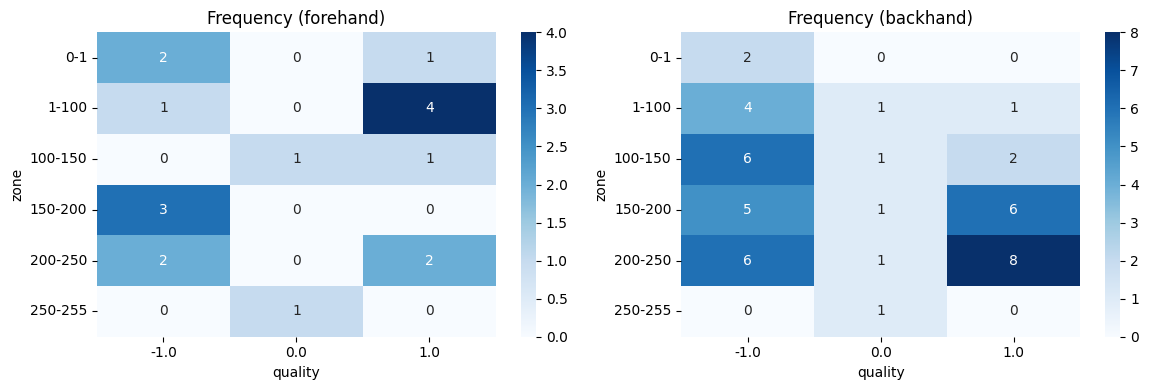

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seuils = [100, 150, 200, 250]
df_groupe_qualite_revers = df_final[(df_final["lateralite"] == "revers") & 
         (df_final["effet_coup"].isin(["topspin", "bloc"]))].groupby("num_point")["zone_modele_r","qualite"].min().reset_index()
df_groupe_qualite_coup_droit = df_final[(df_final["lateralite"] == "coup_droit") & 
         (df_final["effet_coup"].isin(["topspin", "bloc"]))].groupby("num_point")["zone_modele_cd","qualite"].min().reset_index()


df_filtre_joueur_coup_droit_groupe = df_groupe_qualite_coup_droit
df_filtre_joueur_coup_droit_groupe.reset_index(drop=True, inplace=True)
df_filtre_joueur_revers_groupe = df_groupe_qualite_revers
df_filtre_joueur_revers_groupe.reset_index(drop=True, inplace=True)

bins = [0, 1, 100, 150, 200, 250, 256]  # Ajouter 0 et inf pour couvrir toutes les valeurs
labels = ["0-1", "1-100", "100-150", "150-200", "200-250", "250-255"]

# Création de la colonne 'zone'
df_filtre_joueur_coup_droit_groupe["valeur_zone"] = pd.cut(df_filtre_joueur_coup_droit_groupe["zone_modele_cd"], bins=bins, labels=labels, right=False)
df_filtre_joueur_revers_groupe["valeur_zone"] = pd.cut(df_filtre_joueur_revers_groupe["zone_modele_r"], bins=bins, labels=labels, right=False)



# Création des tables de contingence
contingency_table1_groupe = pd.crosstab(df_filtre_joueur_coup_droit_groupe["valeur_zone"], df_filtre_joueur_coup_droit_groupe["qualite"])
contingency_table2_groupe = pd.crosstab(df_filtre_joueur_revers_groupe["valeur_zone"], df_filtre_joueur_revers_groupe["qualite"])

# Création des sous-graphes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Tracé de la première heatmap
sns.heatmap(contingency_table1_groupe, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Frequency (forehand)")
axes[0].set_xlabel("quality")
axes[0].set_ylabel("zone")

# Tracé de la deuxième heatmap
sns.heatmap(contingency_table2_groupe, annot=True, cmap="Blues", fmt="d", ax=axes[1])
axes[1].set_title("Frequency (backhand)")
axes[1].set_xlabel("quality")
axes[1].set_ylabel("zone")

# Affichage des graphiques
plt.tight_layout()
plt.show()



In [138]:
q=1

df_min = df_final[(df_final["lateralite"] == "revers") & (df_final["effet_coup"] == "topspin") & (df_final["qualite"] == q) & (df_final["num_coup"] != 0)].groupby("num_point")["zone_modele_r"].min().reset_index()
print("Min:")
print(df_min)
df_moyenne = df_final[(df_final["lateralite"] == "revers") & (df_final["effet_coup"] == "topspin") & (df_final["qualite"] == q) & (df_final["num_coup"] != 0)].groupby("num_point")["zone_modele_r"].mean().reset_index()
print("Moyenne:")
print(df_moyenne)


Min:
    num_point  zone_modele_r
0           5              0
1           6            229
2          12            180
3          22            196
4          40            238
5          49            190
6          52            219
7          54            183
8          61            245
9          62            196
10         63            183
11         65             91
12         67             91
Moyenne:
    num_point  zone_modele_r
0           5     222.545455
1           6     247.666667
2          12     216.181818
3          22     241.500000
4          40     249.363636
5          49     224.500000
6          52     240.772727
7          54     244.314286
8          61     253.300000
9          62     246.782609
10         63     245.826087
11         65     239.415094
12         67     217.884615


In [109]:
len(df_final[(df_final["lateralite"] == "revers") & (df_final["effet_coup"] == "topspin") & (df_final["qualite"] == 1)])

4875

### Test calcul orientation

[0. 2.]


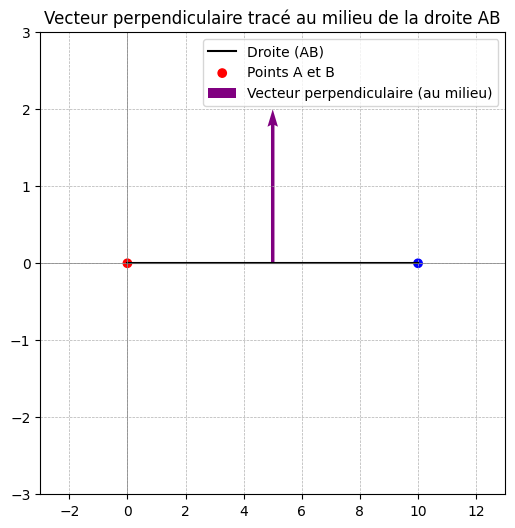

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Coordonnées des deux points
xA, yA = 2, 3  # Point A
xB, yB = 5, 7  # Point B

xA, yA = 0, 0  # Point A
xB, yB = 10, 0  # Point B

# Calcul du milieu entre A et B
xM, yM = (xA + xB) / 2, (yA + yB) / 2  # Coordonnées du point milieu M

# Calcul du vecteur directeur
vecteur_directeur = np.array([xB - xA, yB - yA])

# Calcul du vecteur perpendiculaire
vecteur_perpendiculaire = np.array([-(yB - yA), xB - xA])  # Ou (yB - yA, -(xB - xA))

# Normalisation et mise à l'échelle du vecteur perpendiculaire
norme = np.linalg.norm(vecteur_perpendiculaire)
if norme != 0:
    vecteur_perpendiculaire = vecteur_perpendiculaire / norme  # Normalisation
    vecteur_perpendiculaire *= 2  # Agrandissement pour visibilité

# Tracé des points et de la droite
plt.figure(figsize=(6,6))
plt.plot([xA, xB], [yA, yB], 'k-', label="Droite (AB)")  # Ligne entre A et B
plt.scatter([xA, xB], [yA, yB], color=['red', 'blue'], label="Points A et B")  # Points A et B

print(vecteur_perpendiculaire)
# Tracé du vecteur perpendiculaire depuis le point milieu M
plt.quiver(xM, yM, vecteur_perpendiculaire[0], vecteur_perpendiculaire[1], angles='xy', scale_units='xy', scale=1, color='purple', label="Vecteur perpendiculaire (au milieu)")

# Réglages du graphique
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlim(min(xA, xB) - 3, max(xA, xB) + 3)
plt.ylim(min(yA, yB) - 3, max(yA, yB) + 3)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.title("Vecteur perpendiculaire tracé au milieu de la droite AB")
plt.show()


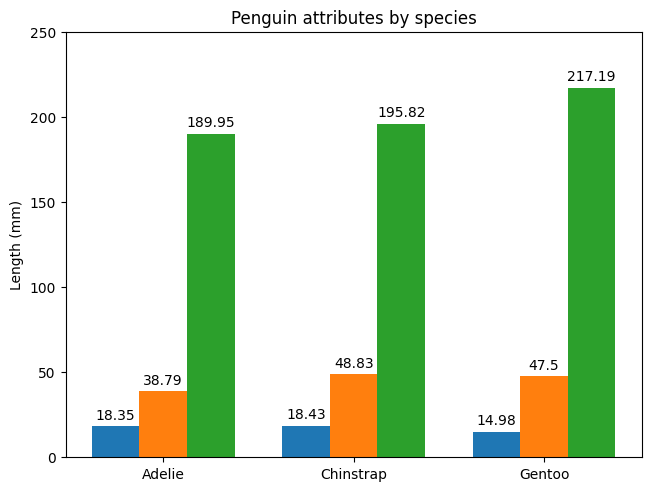

In [59]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.set_ylim(0, 250)

plt.show()

ValueError: could not broadcast input array from shape (3,) into shape (77,)

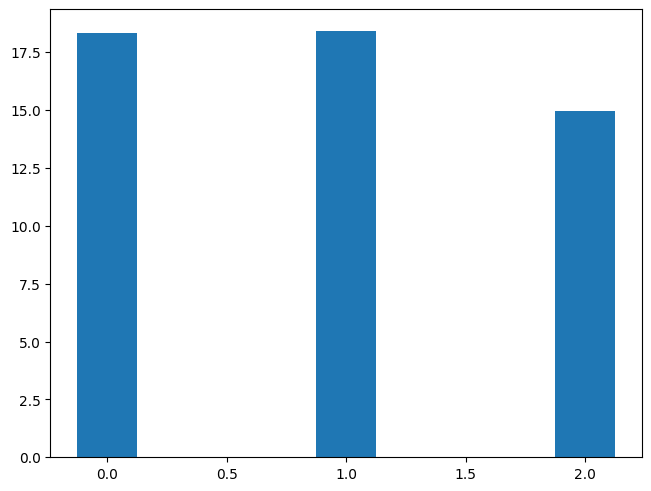

In [38]:

import matplotlib.pyplot as plt
import numpy as np

species = (-1, 0, 1)
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
x = np.array(x)
y = np.array(y)

# Création des traits au lieu de points
colors = assign_colors(df_filtre["effet_coup"].tolist())  # Couleurs associées
plt.hlines(y, xmin=x-0.2, xmax=x+0.2, colors=colors, linewidth=1) 

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left')
ax.set_ylim(0, 250)

plt.show()

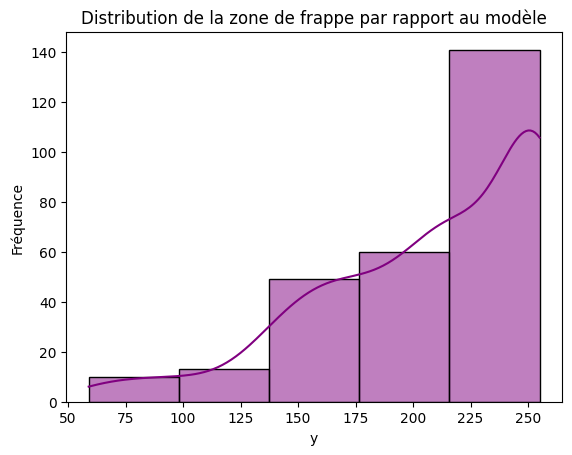

In [37]:
# Histogramme de la variable y
sns.histplot(y, bins=5, kde=True, color='purple')
plt.title("Distribution de la zone de frappe par rapport au modèle")
plt.xlabel("y")
plt.ylabel("Fréquence")
plt.show()

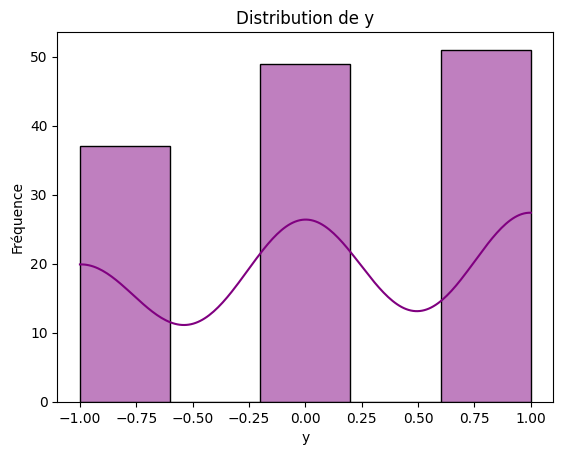

In [66]:
# Histogramme de la variable y
sns.histplot(x, bins=5, kde=True, color='purple')
plt.title("Distribution de y")
plt.xlabel("y")
plt.ylabel("Fréquence")
plt.show()